In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import h5py
import csv
import math
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.animation as animation
from matplotlib.animation import ArtistAnimation

#dir = '/Users/maedarn/Dropbox/analysis/gravity_solver/telegraph/test-tel/ts-performance-time/cr00064ms032lp001/'


9797518.176004808 0.02675616368255578 9798075.18780485 0.026754642618611144 9798617.098714251 0.026753162957495077


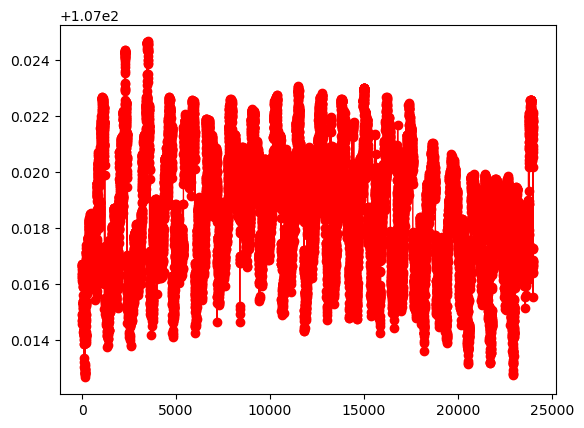

In [21]:
num=3
ncore=24000
ncell=64
lp=4000.0
dir = '/Users/maedarn/Dropbox/analysis/flow/telegraph/cr24000num03lp4e3/'

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

int_list = [x for x in range(1, ncore+1, 1)]  

#print(int_list)
f90= open(dir+'CPU_TIME.DAT', 'rb')
ary = np.fromfile(f90, np.float64,count=ncore*num) 
uvhpy = ary.reshape(num,ncore, order='F')
slice1= uvhpy[0,:]
slice2= uvhpy[1,:]
slice3= uvhpy[2,:]
#slice1= ncell*ncell*ncell/(uvhpy[0,:]*lp)
#slice2= ncell*ncell*ncell/(uvhpy[1,:]*lp)
#slice3= ncell*ncell*ncell/(uvhpy[2,:]*lp)
#print(slice3)
'''
slice4= uvhpy[3,:]
slice5= uvhpy[4,:]
slice6= uvhpy[5,:]
slice7= uvhpy[6,:]
slice8= uvhpy[7,:]
slice9= uvhpy[8,:]
slice10=uvhpy[9,:]
slice11=uvhpy[10,:]
slice12=uvhpy[11,:]
'''

mx3=np.max(slice3)/lp
mn3=np.mean(slice3)/lp
mi3 =np.min(slice3)/lp


#plt.ylim([0.0, 0.00001]) 
plt.plot(int_list,slice3,marker="o",color='red', linewidth = 1) 

#print(slice1,slice2,slice3)
print(ncell*ncell*ncell/mx3, mx3,ncell*ncell*ncell/mn3, mn3,ncell*ncell*ncell/mi3, mi3)

plt.show()

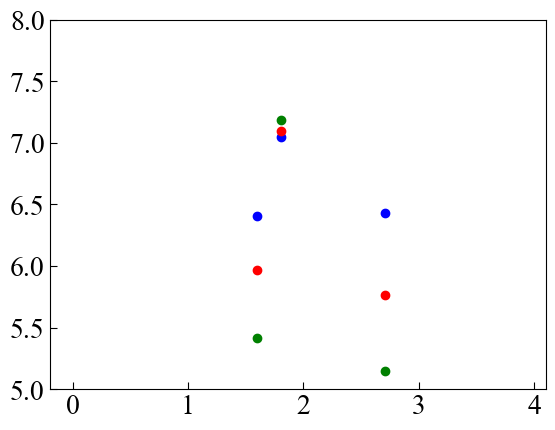

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
#fig.subplots_adjust(bottom=0, left=0, top=1, right=1)

num=3

plt.rcParams["font.family"] = "Times New Roman"      #全体のフォントを設定
plt.rcParams["xtick.direction"] = "in"               #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["ytick.direction"] = "in"               #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["xtick.major.size"] = 5                #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 5                #y軸主目盛り線の長さ
plt.rcParams["font.size"] = 20                       #フォントの大きさ

scl1=[0] * num
scl2=[0] * num
scl3=[0] * num

prs=[0] * num



scl1[0]=193681.5608958686 
#0.16918492317199707 
scl2[0]=624350.2114937712 
#0.052483364939689636 
scl3[0]=2522741.4367107195 
#0.012989044189453125

scl1[1]=139420.3961419697 
#0.2350301742553711 
scl2[1]=575764.4620807866 
#0.05691216140985489 
scl3[1]=2672973.539849858 
#0.01225900650024414

scl1[2]=258154.16389833787
scl2[2]=934545.791559139
scl3[2]=2522741.4367107195

prs[0]=64.0
prs[1]=512.0
prs[2]=40.0



scl1=np.log10(scl1)
scl2=np.log10(scl2)
scl3=np.log10(scl3)

prs=np.log10(prs)


plt.xlim([-0.2, 4.1]) # x方向の描画範囲を指定
plt.ylim([5, 8]) # y方向の描画範囲を指定
plt.plot(prs, scl3 ,c='blue',marker="o",linewidth=0)
plt.plot(prs, scl2 ,c='red',marker="o",linewidth=0)
plt.plot(prs, scl1 ,c='green',marker="o",linewidth=0)


#pp = PdfPages('/Users/maeda/Desktop/phi'+"%03.f"%(i)+'.pdf')
pp = PdfPages('/Users/maedarn/Desktop/phierr.pdf')
# 画像をPDFとして保存する
pp.savefig(fig, bbox_inches='tight',transparent=True)
# PDFの保存終了
pp.close()


plt.show()

In [12]:
dir1 = '/Users/maedarn/Dropbox/analysis/flow/telegraph/TMD_STN/'
rows = []
with open(dir1+'TMD_STN_FFT.csv') as f:
    print(f.read())
    reader = csv.reader(f)
    rows = [row for row in reader]
    
#header = rows.pop(0)
data = np.float_(np.array(rows).T)

fig, ax = plt.subplots()
ax.plot(data[0], data[1], linestyle='solid', marker='o')

plt.show()

1, 13308770.346731884
1.9960642668855437, 12689610.031679235
4.01642296431054, 7221388.1613307465
8.017038359758788, 6112331.451408502
16.00252379616521, 4044795.3382054237
20.041015354294164, 3677199.914775936
31.94206592951097, 2531910.0687860567
40.00315462081114, 2177363.9817364677
79.84886750129841, 2109297.952256366
159.38347117062003, 1499208.6143096138
320.7068251064044, 1032269.5185890117
640.1514337412066, 788046.2815669904
1277.7834022863708, 677695.3141341233
2571.1189191144995, 385662.0421163456
3842.750908006269, 313726.87541983894
5132.118600357833, 282959.4078322454
7984.886750129854, 230180.73130224607



IndexError: pop from empty list

              0             1
0      1.000000  4.778706e+07
1      1.996064  3.736060e+07
2      4.016423  3.039195e+07
3      8.017038  2.572437e+07
4     16.002524  2.043360e+07
5     20.041015  1.729542e+07
6     31.942066  1.258925e+07
7     40.003155  1.007972e+07
8     79.848868  8.877197e+06
9    159.383471  8.264972e+06
10   320.706825  8.134762e+06
11   640.151434  7.943282e+06
12  1288.094257  7.694969e+06
13  2571.118919  7.573739e+06
14  3842.750908  7.336978e+06
15  5132.118600  6.940317e+06
16  8049.319430  6.513180e+06


<Axes: xlabel='0'>

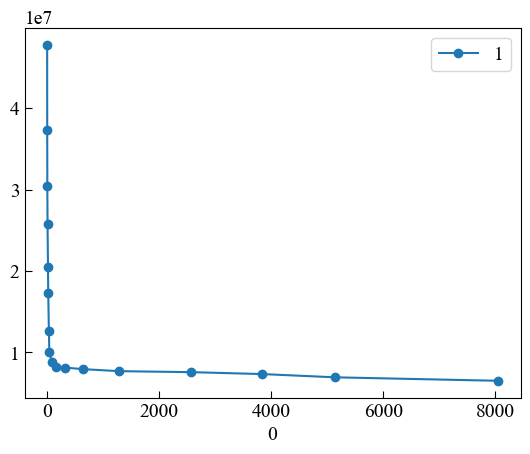

In [49]:
dir1 = '/Users/maedarn/Dropbox/analysis/flow/telegraph/TMD_STN/TMD_STN_FFT.csv'
path_csv = '/Users/maedarn/Dropbox/analysis/flow/telegraph/TMD_STN/TMD_STN_FMG1.csv'
df_csv = pd.read_csv(path_csv,header=None)
print(df_csv)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

df_csv.plot(ax=ax, x=df_csv.columns[0], y=df_csv.columns[1], marker='o')

In [6]:
dir1 = '/Users/maedarn/Dropbox/analysis/flow/telegraph/TMD_STN/'




fig = plt.figure()
#fig = plt.figure(figsize=matplotlib.figure.figaspect(1))
w, h = fig.get_figwidth(), fig.get_figheight()
ax = fig.add_axes((0, 0, 1.0, 0.98)) #[x0, y0, width, height]
#ax = fig.add_subplot(111)

num=6

plt.rcParams["font.family"] = "Times New Roman"      #全体のフォントを設定
plt.rcParams["xtick.direction"] = "in"               #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["ytick.direction"] = "in"               #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["xtick.major.size"] = 5                #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 5                #y軸主目盛り線の長さ
plt.rcParams["font.size"] = 20                       #フォントの大きさ

scl1=[0] * num
prs=[0] * num



scl1[0]=15234459.017417116
scl1[1]=12503777.387464661
scl1[2]=11898365.853070104
scl1[3]=11779798.638318917
scl1[4]=11185834.086412992
scl1[5]=8002108.327095462

prs[0]=48.0
prs[1]=480.0
prs[2]=1200.0
prs[3]=4800.0
prs[4]=9600.0
prs[5]=24000.0



#scl1=np.log10(scl1)
#prs=np.log10(prs)



plt.xlim([0.8, 11000.0]) # x方向の描画範囲を指定
plt.ylim([100000, 100000000]) # y方向の描画範囲を指定
#plt.plot(prs, scl3 ,c='blue',marker="o",linewidth=0)
#plt.plot(prs, scl2 ,c='red',marker="o",linewidth=0)
plt.plot(prs, scl1 ,c='green',marker="o",linewidth=1)


#plt.xticks(color="None")
#plt.yticks(color="None")

#aspect = (ax.get_xlim()[1] - ax.get_xlim()[0]) / (ax.get_ylim()[1] - ax.get_ylim()[0])                     
#ax.set_aspect(aspect)

ax.set_yscale('log')
ax.set_xscale('log')

#pp = PdfPages('/Users/maeda/Desktop/phi'+"%03.f"%(i)+'.pdf')
pp = PdfPages('/Users/maedarn/Desktop/phierr.pdf')
# 画像をPDFとして保存する
pp.savefig(fig, bbox_inches='tight',transparent=True)
# PDFの保存終了
pp.close()


plt.show()

1, 13308770.346731884
1.9960642668855437, 12689610.031679235
4.01642296431054, 7221388.1613307465
8.017038359758788, 6112331.451408502
16.00252379616521, 4044795.3382054237
20.041015354294164, 3677199.914775936
31.94206592951097, 2531910.0687860567
40.00315462081114, 2177363.9817364677
79.84886750129841, 2109297.952256366
159.38347117062003, 1499208.6143096138
320.7068251064044, 1032269.5185890117
640.1514337412066, 788046.2815669904
1277.7834022863708, 677695.3141341233
2571.1189191144995, 385662.0421163456
3842.750908006269, 313726.87541983894
5132.118600357833, 282959.4078322454
7984.886750129854, 230180.73130224607



ValueError: I/O operation on closed file.

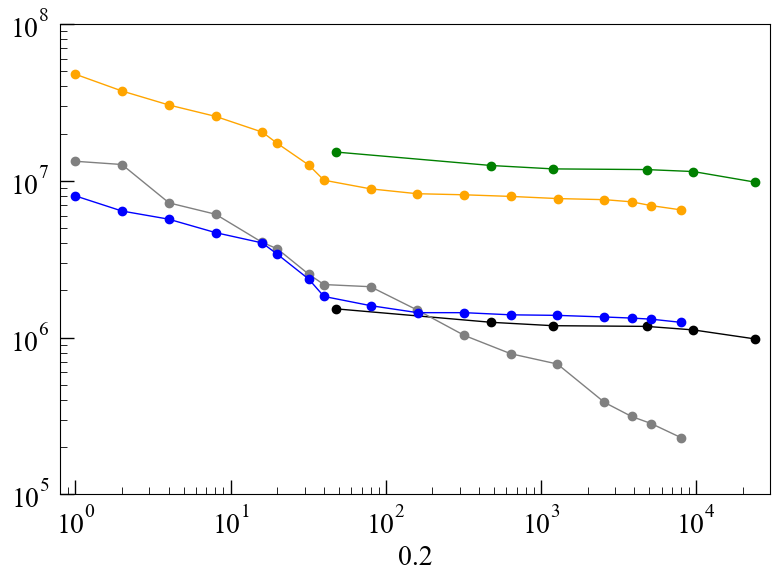

In [70]:
path_csv = '/Users/maedarn/Dropbox/analysis/flow/telegraph/TMD_STN/total.csv'
df_csv = pd.read_csv(path_csv,header=0)#header=none


fig = plt.figure()
#fig = plt.figure(figsize=matplotlib.figure.figaspect(1))
w, h = fig.get_figwidth(), fig.get_figheight()
ax = fig.add_axes((0, 0, 1.109, 0.98)) #[x0, y0, width, height]
#ax = fig.add_subplot(111)

num=6

plt.rcParams["font.family"] = "Times New Roman"      #全体のフォントを設定
plt.rcParams["xtick.direction"] = "in"               #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["ytick.direction"] = "in"               #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["xtick.major.size"] = 15                #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 15                #y軸主目盛り線の長さ
plt.rcParams["font.size"] = 20                       #フォントの大きさ

scl1=[0] * num
scl2=[0] * num
prs=[0] * num



scl1[0]=15234459.017417116#/10.0
scl1[1]=12503777.387464661#/10.0
scl1[2]=11898365.853070104#/10.0,13134323.630987942
scl1[3]=11779798.638318917#/10.0
scl1[4]=11445898.078117644#11185834.086412992#/10.0
scl1[5]=9798075.18780485#9093856.110688003#9094204.0#8002108.327095462#/10.0

scl2[0]=15234459.017417116/10.0
scl2[1]=12503777.387464661/10.0
scl2[2]=11898365.853070104/10.0
scl2[3]=11779798.638318917/10.0
scl2[4]=11185834.086412992/10.0
scl2[5]=9798075.18780485/10.0#9093856.110688003/10.0#9094204.0/10.0#8002108.327095462/10.0

prs[0]=48.0
prs[1]=480.0
prs[2]=1200.0
prs[3]=4800.0
prs[4]=9600.0
prs[5]=24000.0



#scl1=np.log10(scl1)
#prs=np.log10(prs)



plt.xlim([0.8, 30000.0]) # x方向の描画範囲を指定
plt.ylim([100000, 100000000]) # y方向の描画範囲を指定
#plt.plot(prs, scl3 ,c='blue',marker="o",linewidth=0)
#plt.plot(prs, scl2 ,c='red',marker="o",linewidth=0)
plt.plot(prs, scl1 ,c='green',marker="o",linewidth=1)
plt.plot(prs, scl2 ,c='black',marker="o",linewidth=1)

x=df_csv.columns[0]
y=df_csv.columns[1]

df_csv.plot(ax=ax, x=df_csv.columns[0], y=df_csv.columns[1] ,c='gray',marker="o",linewidth=1,legend=False)
df_csv.plot(ax=ax, x=df_csv.columns[2], y=df_csv.columns[3] ,c='blue',marker="o",linewidth=1,legend=False)
df_csv.plot(ax=ax, x=df_csv.columns[4], y=df_csv.columns[5] ,c='orange',marker="o",linewidth=1,legend=False)
#df_csv.plot(ax=ax, x=df_csv1.columns[0], y=df_csv1.columns[1] ,c='orange',marker="o",linewidth=1)
#df_csv.plot(ax=ax, x2=df_csv2.columns[0], y2=df_csv2.columns[1] ,c='blue',marker="o",linewidth=1)


#plt.xticks(color="None")
#plt.yticks(color="None")

#aspect = (ax.get_xlim()[1] - ax.get_xlim()[0]) / (ax.get_ylim()[1] - ax.get_ylim()[0])                     
#ax.set_aspect(aspect)

ax.set_yscale('log')
ax.set_xscale('log')

plt.tick_params(width = 1, length = 10,pad=8)
plt.tick_params(which='minor', length=5)


#plt.gca.legend_ =None

#pp = PdfPages('/Users/maeda/Desktop/phi'+"%03.f"%(i)+'.pdf')
pp = PdfPages('/Users/maedarn/Desktop/phierr.pdf')
# 画像をPDFとして保存する
pp.savefig(fig, bbox_inches='tight',transparent=True)
# PDFの保存終了
pp.close()


plt.show()

9094204.159260262 0.02882539201993495 9094204.159260262 0.02882539201993495 9094204.159260262 0.02882539201993495


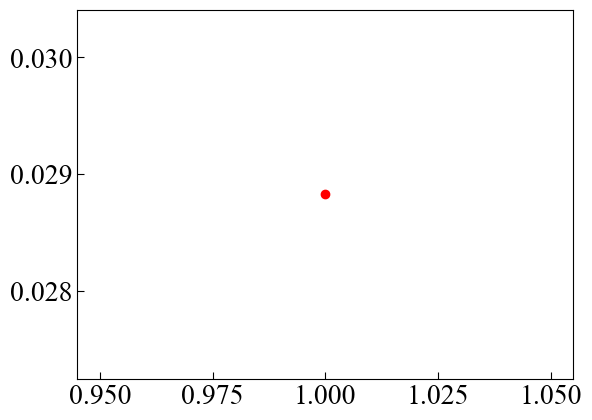

In [79]:
num=3
ncore=1
ncell=64
dir = '/Users/maedarn/Dropbox/analysis/flow/telegraph/cr24000num02lp4e3/'

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

int_list = [x for x in range(1, ncore+1, 1)]  

#print(int_list)
f90= open(dir+'CPU_TIME00000.DAT', 'rb')
ary = np.fromfile(f90, np.float64,count=ncore*num) 
uvhpy = ary.reshape(num,ncore, order='F')
slice1= uvhpy[0,:]
slice2= uvhpy[1,:]
slice3= uvhpy[2,:]
'''
slice4= uvhpy[3,:]
slice5= uvhpy[4,:]
slice6= uvhpy[5,:]
slice7= uvhpy[6,:]
slice8= uvhpy[7,:]
slice9= uvhpy[8,:]
slice10=uvhpy[9,:]
slice11=uvhpy[10,:]
slice12=uvhpy[11,:]
'''

mx3=np.max(slice3)
mn3=np.mean(slice3)
mi3 =np.min(slice3)


#plt.ylim([0.0, 0.00001]) 
plt.plot(int_list,slice3,marker="o",color='red', linewidth = 1) 

#print(slice1,slice2,slice3)
print(ncell*ncell*ncell/mx3, mx3,ncell*ncell*ncell/mn3, mn3,ncell*ncell*ncell/mi3, mi3)

plt.show()

In [ ]:
""" ライブラリのインポート """
#import pandas as pd
from pathlib import Path 

""" CSVファイルのパス(カレントディレクトリ) """
p = Path('/Users/maedarn/Dropbox/analysis/flow/telegraph/TMD_STN/')

""" 取得するファイル種類(csv) """
file_name = '*.csv'

""" 読み込むcsvファイルパスを"csv_files"に格納 """
csv_files = p.glob(file_name) 

""" カラム(列)名 """
column_name = ('A', 'B', 'C', 'D', 'E')

def main():    
    """ メインの処理 """
    """ 一括でディレクトリ（フォルダ）内のcsvファイルを一括で読込 """
    for file in csv_files:
        df1 = pd.read_csv(file, names=column_name)
        print(file)
        print(df1)


In [37]:
import pandas as pd
import glob

path ='/Users/maedarn/Dropbox/analysis/flow/telegraph/TMD_STN'
allFiles = glob.glob(path + "/*.csv") # 指定したフォルダーの全エクセルファイルを変数に代入します
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=None) # エクセルをデータフレームとして読み込む
    list_.append(df)
frame = pd.concat(list_, join='inner') # joinをinnerに指定

#frame.to_csv("/path/to/download/all_concat.xlsx", encoding="utf-8-sig")

              0             1
0      1.000000  4.778706e+07
1      1.996064  3.736060e+07
2      4.016423  3.039195e+07
3      8.017038  2.572437e+07
4     16.002524  2.043360e+07
5     20.041015  1.729542e+07
6     31.942066  1.258925e+07
7     40.003155  1.007972e+07
8     79.848868  8.877197e+06
9    159.383471  8.264972e+06
10   320.706825  8.134762e+06
11   640.151434  7.943282e+06
12  1288.094257  7.694969e+06
13  2571.118919  7.573739e+06
14  3842.750908  7.336978e+06
15  5132.118600  6.940317e+06
16  8049.319430  6.513180e+06


In [45]:
import glob
import re

# 複数ファイルをリストに格納
file_list = glob.glob('/Users/maedarn/Dropbox/analysis/flow/telegraph/TMD_STN/*csv')
#file_list = sorted(file_list, key=lambda x:int((re.search(r"[0-9]+", x)).group(0)))
print(file_list)

df_list = []
for file in file_list:
    df = pd.read_csv(file,header=None)
    # データの前処理
    df2 = df.copy()
    #df2['stress'] = df['stress'] / 1000
    df_list.append(df2)
df_list


import matplotlib.pyplot as plt
import matplotlib.cm as cm
#import japanize_matplotlib
plt.rcParams["font.size"] = 14
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

def plot_df_func(DF_list, LABEL_list, X_name, Y_name):
    plt.figure(num=1, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
    for i, (my_DF, my_LABEL) in enumerate(zip(DF_list, LABEL_list)):
        x_list = my_DF[X_name].values.tolist()
        y_list = my_DF[Y_name].values.tolist()
        plt.scatter(x_list, y_list, c=cm.hsv(i/n_files), s=30) #, color="red")
        plt.plot(x_list, y_list, c=cm.hsv(i/n_files), label=my_LABEL)



    plt.legend(loc='best', fontsize=18)  # 'upper left' and so on
    #plt.legend(bbox_to_anchor=(1, 0.95)) # 凡例の位置
    plt.title("graph", fontsize=18)
    plt.xlabel(X_name, fontsize=20)
    plt.ylabel(Y_name, fontsize=20)
    plt.tick_params(labelsize=18)
    plt.grid(which="both")
    plt.tight_layout()
    plt.show()
    #plt.savefig(file_name + '.jpg')
    #plt.close()

# グラフの作成
#label_list = ['data1', 'data2', 'data3', 'data4']
label_list = file_list.copy()
x_data_name = 'x'
y_data_name = 'stress'
plot_df_func(df_list, label_list, x_data_name, y_data_name)




['/Users/maedarn/Dropbox/analysis/flow/telegraph/TMD_STN/TMD_STN_FFT.csv', '/Users/maedarn/Dropbox/analysis/flow/telegraph/TMD_STN/TMD_STN_FMG10.csv', '/Users/maedarn/Dropbox/analysis/flow/telegraph/TMD_STN/TMD_STN_FMG1.csv']


KeyError: 'x'

<Figure size 800x600 with 0 Axes>

In [50]:
import pandas as pd

# データファイルを読み込み、pandasのデータフレームでリスト化する
df_list = []
for file in file_list:
    df = pd.read_csv(filev)
    # データの前処理
    df2 = df.copy()
    #df2['stress'] = df['stress'] / 1000
    df_list.append(df2)
df_list


# グラフ化する関数
myXscale = 'linear' # 'linear' or 'log'
myYscale = 'linear'
my_x_range = (0, 15) # オートレンジにする場合は空()を指定
my_y_range = () # オートレンジにする場合は空()を指定
base_line = 75
n_files = len(file_list)

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import japanize_matplotlib
plt.rcParams["font.size"] = 14
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

def plot_df_func(DF_list, LABEL_list, X_name, Y_name):
    plt.figure(num=1, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
    for i, (my_DF, my_LABEL) in enumerate(zip(DF_list, LABEL_list)):
        x_list = my_DF[X_name].values.tolist()
        y_list = my_DF[Y_name].values.tolist()
        plt.scatter(x_list, y_list, c=cm.hsv(i/n_files), s=30) #, color="red")
        plt.plot(x_list, y_list, c=cm.hsv(i/n_files), label=my_LABEL)

    ### matplotlib option
    # 縦軸,横軸の線形 or 対数の指定
    plt.xscale('log') if myXscale=='log' else plt.xscale(myXscale)
    plt.yscale('log') if myYscale=='log' else plt.yscale(myYscale)

    # 縦軸のレンジの指定
    ax = plt.gca()
    y_min, y_max = ax.get_ylim()
    if my_y_range:
        y_min, y_max = my_y_range
        plt.ylim(y_min, y_max)
    else:
        ax.set_ylim(0, y_max)

    # 基準線
    if my_x_range:
        plt.hlines([base_line], my_x_range[0], my_x_range[1], 'r', linestyles='dashed')
        ax.text(my_x_range[0], base_line, '判断基準' + str(base_line), size=22, color='r')

    plt.legend(loc='best', fontsize=18)  # 'upper left' and so on
    #plt.legend(bbox_to_anchor=(1, 0.95)) # 凡例の位置
    plt.title("graph", fontsize=18)
    plt.xlabel(X_name, fontsize=20)
    plt.ylabel(Y_name, fontsize=20)
    plt.tick_params(labelsize=18)
    plt.grid(which="both")
    plt.tight_layout()
    plt.show()
    #plt.savefig(file_name + '.jpg')
    #plt.close()

# グラフの作成
#label_list = ['data1', 'data2', 'data3', 'data4']
label_list = file_list.copy()
x_data_name = 'x'
y_data_name = 'stress'
plot_df_func(df_list, label_list, x_data_name, y_data_name)



ModuleNotFoundError: No module named 'japanize_matplotlib'

In [54]:
import pandas as pd
import glob

# パスで指定したファイルの一覧をリスト形式で取得. （ここでは一階層下のtestファイル以下）
csv_files = glob.glob('/Users/maedarn/Dropbox/analysis/flow/telegraph/TMD_STN/*csv') 

#読み込むファイルのリストを表示
for a in csv_files:
    print(a)

#csvファイルの中身を追加していくリストを用意
data_list = []

#読み込むファイルのリストを走査
for file in csv_files:
    data_list.append(pd.read_csv(file,header=None))

#リストを全て行方向に結合
#axis=0:行方向に結合, sort
df = pd.concat(data_list, axis=1, sort=True)

df.to_csv("/Users/maedarn/Dropbox/analysis/flow/telegraph/TMD_STN/total.csv",index=False)


/Users/maedarn/Dropbox/analysis/flow/telegraph/TMD_STN/TMD_STN_FFT.csv
/Users/maedarn/Dropbox/analysis/flow/telegraph/TMD_STN/TMD_STN_FMG10.csv
/Users/maedarn/Dropbox/analysis/flow/telegraph/TMD_STN/TMD_STN_FMG1.csv
